Capstone 3: Stock Prediction

Get Data

Step 1: Define a function to get stock data for any company from Google Finance




In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file

from statsmodels.tsa.stattools import adfuller


Step 1: get dataset

In [2]:
data = pd.read_csv('../data/OCUL_historical_data.csv', index_col='Date', parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-25,13.00,13.25,12.611,13.15,13.15,1877800
2014-07-28,13.05,13.25,12.800,12.84,12.84,292500
2014-07-29,12.85,13.00,12.560,12.90,12.90,103300
2014-07-30,13.00,13.07,12.810,12.94,12.94,80600
2014-07-31,12.94,13.09,11.900,12.86,12.86,154300


In [3]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
data.describe()  # summary statistics

,Open,High,Low,Close,Adj Close,Volume
count,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2.507000e+03
mean,8.901211,9.192551,8.604508,8.895983,8.895983,8.034785e+05
std,6.614853,6.795987,6.414512,6.620018,6.620018,1.124268e+06
min,2.100000,2.210000,1.995000,2.080000,2.080000,1.080000e+04
25%,4.730000,4.945000,4.607500,4.747500,4.747500,3.072000e+05
50%,6.460000,6.660000,6.290000,6.450000,6.450000,5.448000e+05
75%,10.305000,10.695000,10.010000,10.320000,10.320000,8.927000e+05
max,44.189999,44.189999,42.290001,43.270000,43.270000,2.717410e+07


Summary of non-missing values and data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2507 entries, 2014-07-25 to 2024-07-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2507 non-null   float64
 1   High       2507 non-null   float64
 2   Low        2507 non-null   float64
 3   Close      2507 non-null   float64
 4   Adj Close  2507 non-null   float64
 5   Volume     2507 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.1 KB


In [6]:
data.index

DatetimeIndex(['2014-07-25', '2014-07-28', '2014-07-29', '2014-07-30',
               '2014-07-31', '2014-08-01', '2014-08-04', '2014-08-05',
               '2014-08-06', '2014-08-07',
               ...
               '2024-06-27', '2024-06-28', '2024-07-01', '2024-07-02',
               '2024-07-03', '2024-07-05', '2024-07-08', '2024-07-09',
               '2024-07-10', '2024-07-11'],
              dtype='datetime64[ns]', name='Date', length=2507, freq=None)

In [7]:
# Convert the index of Dataframe to datetime
data.index = pd.to_datetime(data.index)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-25,13.00,13.25,12.611,13.15,13.15,1877800
2014-07-28,13.05,13.25,12.800,12.84,12.84,292500
2014-07-29,12.85,13.00,12.560,12.90,12.90,103300
2014-07-30,13.00,13.07,12.810,12.94,12.94,80600
2014-07-31,12.94,13.09,11.900,12.86,12.86,154300


In [8]:
# return a boolean that notes where missing values are
missing = data.isna()
missing

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-25,False,False,False,False,False,False
2014-07-28,False,False,False,False,False,False
2014-07-29,False,False,False,False,False,False
2014-07-30,False,False,False,False,False,False
2014-07-31,False,False,False,False,False,False
...,...,...,...,...,...,...
2024-07-05,False,False,False,False,False,False
2024-07-08,False,False,False,False,False,False
2024-07-09,False,False,False,False,False,False


Plot the trend

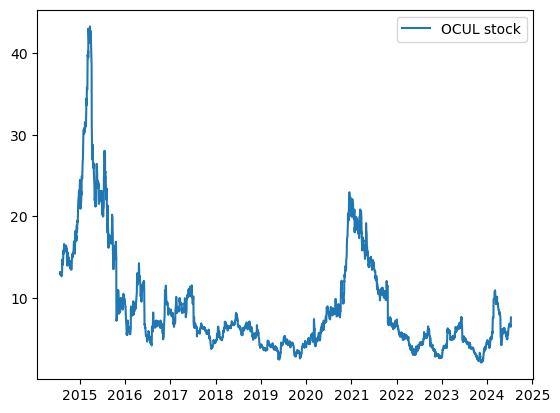

In [9]:
plt.plot(data.index, data.Close)  
plt.legend(['OCUL stock'])

plt.show()

zooming in for year 2024, by slicing the dataframe

In [10]:
data_2024 = data['2024-01-01':'2024-07-13']
data_2024

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,4.40,4.875,4.310,4.81,4.81,1627200
2024-01-03,4.75,4.800,4.490,4.54,4.54,1405900
2024-01-04,4.60,4.630,4.388,4.41,4.41,1031300
2024-01-05,4.37,4.435,4.181,4.40,4.40,1063200
2024-01-08,4.35,4.825,4.290,4.74,4.74,1068200
...,...,...,...,...,...,...
2024-07-05,6.68,6.740,6.430,6.67,6.67,1128600
2024-07-08,6.74,6.870,6.610,6.66,6.66,1366300
2024-07-09,6.66,6.740,6.440,6.45,6.45,1074700


**Visualizing 2024 stock price trend**

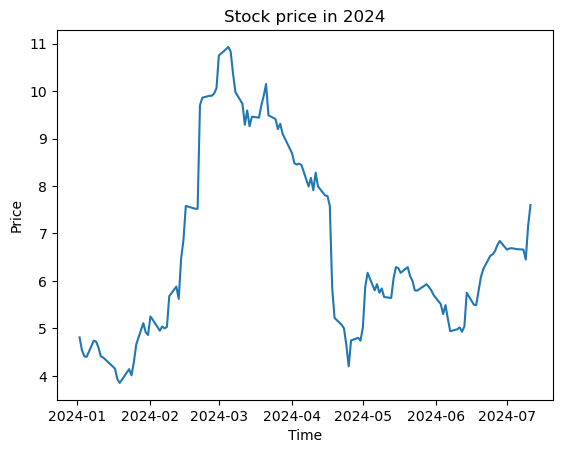

In [11]:
fig, ax = plt.subplots()
ax.plot(data_2024.index, data_2024['Close'])
ax.set_xlabel('Time')
ax.set_ylabel('Price')
plt.title('Stock price in 2024')
plt.show()

**Visualizing Price trend at Close and Open in 2024**

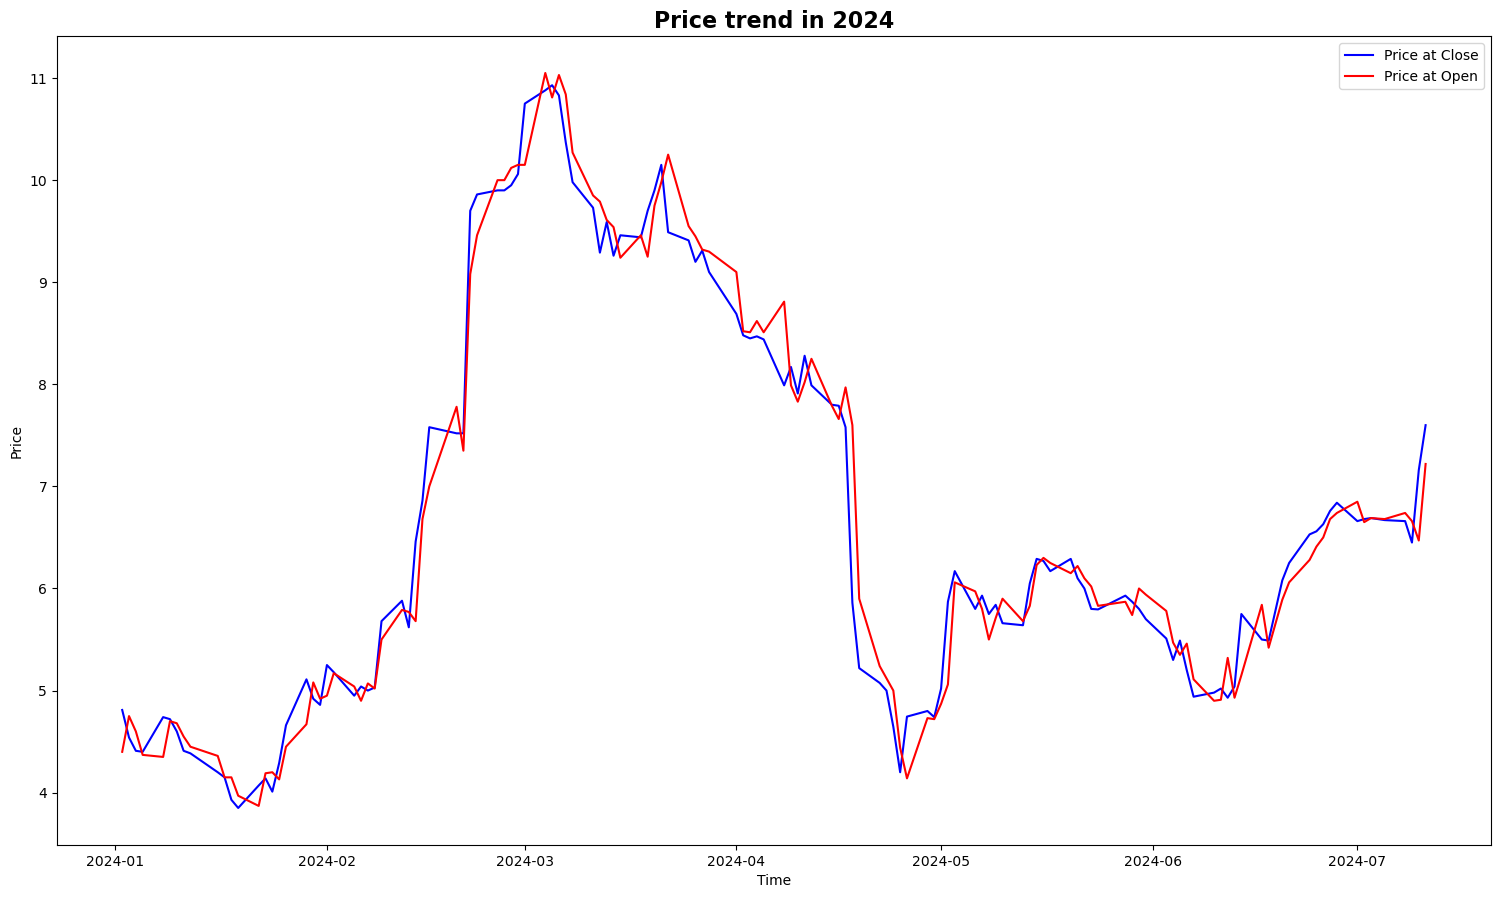

In [12]:
fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
ax.plot(data_2024.index, data_2024['Close'], color='blue', label='Price at Close')
ax.plot(data_2024.index, data_2024['Open'], color='red', label='Price at Open')
plt.legend()
plt.title('Price trend in 2024', fontsize=16, fontweight='bold')
ax.set_xlabel('Time')
ax.set_ylabel('Price')

plt.show()

In [13]:
data['OpenClose_diff'] = np.where(data['Open'] > data['Close'],'Close_Price_Down', 'Close_Price_Up')
data.head()

,Open,High,Low,Close,Adj Close,Volume,OpenClose_diff
Date,,,,,,,
2014-07-25,13.00,13.25,12.611,13.15,13.15,1877800,Close_Price_Up
2014-07-28,13.05,13.25,12.800,12.84,12.84,292500,Close_Price_Down
2014-07-29,12.85,13.00,12.560,12.90,12.90,103300,Close_Price_Up
2014-07-30,13.00,13.07,12.810,12.94,12.94,80600,Close_Price_Down
2014-07-31,12.94,13.09,11.900,12.86,12.86,154300,Close_Price_Down


In [14]:
data.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
OpenClose_diff     object
dtype: object

In [15]:
data['OpenClose_diff'].value_counts()

OpenClose_diff
Close_Price_Down    1300
Close_Price_Up      1207
Name: count, dtype: int64

## When close price is higher than open price the overall trend rises and a price momentum is created. 
The blue markers in plot below are clustered together on upper trends, while the red markers are clustered together in down trends

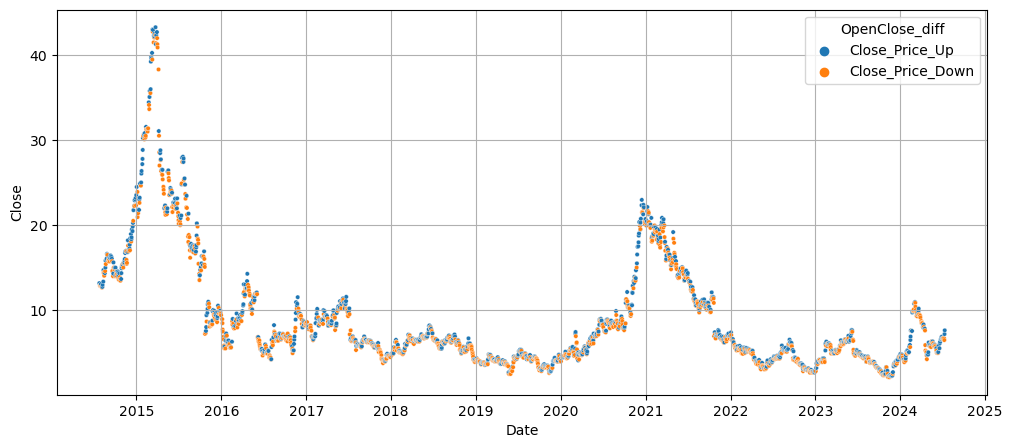

In [16]:
fig, ax=plt.subplots(figsize=(12,5))
ax.grid(True)
sns.scatterplot(x=data.index,
               y='Close',
               data=data,
               hue='OpenClose_diff',
               s=10,
               )

plt.show()

Applying the adfuller test.  Dicky-Fuller only tests for trend stationarity

In [17]:
results = adfuller(data['Close'])
results

(-2.505841473276515,
 0.11405949301223856,
 26,
 2480,
 {'1%': -3.4329895489772104,
  '5%': -2.8627061345839557,
  '10%': -2.5673907792989072},
 3895.3353771317556)

The zero element is the test statistic. the more negative this number, the more likely that the data is stationary. 

In [18]:
results[0]

-2.505841473276515

the first element is the test p-value. . If the p-value is smaller than 0.05, we reject the null hypothesis and assume our time series must be stationary. 

In [19]:
results[1]  # we cannot reject the null hypothesis. Series is not stationary.

0.11405949301223856

The fourth item in the tuple is a dictionary. This stores the critical values of the test statistic which equate to different p-values. In this case, if we wanted a p-value of 0.05 or below, our test statistic needed to be below -2.862.

In [20]:
results[4]

{'1%': -3.4329895489772104,
 '5%': -2.8627061345839557,
 '10%': -2.5673907792989072}

One very common way to make a time series stationary is to take its difference. This is where, from each value in our time series we subtract the previous value. 
Note: this gives us one NaN value at the start since there is no previous value to subtract from it

Variables must not be strings, therefore must delete OpenClose_diff column

In [21]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'OpenClose_diff'],
      dtype='object')

In [22]:
data=data.drop(['OpenClose_diff'], axis=1)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-25,13.00,13.250,12.611,13.15,13.15,1877800
2014-07-28,13.05,13.250,12.800,12.84,12.84,292500
2014-07-29,12.85,13.000,12.560,12.90,12.90,103300
2014-07-30,13.00,13.070,12.810,12.94,12.94,80600
2014-07-31,12.94,13.090,11.900,12.86,12.86,154300
...,...,...,...,...,...,...
2024-07-05,6.68,6.740,6.430,6.67,6.67,1128600
2024-07-08,6.74,6.870,6.610,6.66,6.66,1366300
2024-07-09,6.66,6.740,6.440,6.45,6.45,1074700


## Take the difference to transform data in stationary data

In [23]:
data_stationary = data.diff()
data_stationary.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-25,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-28,0.05,0.00,0.189,-0.31,-0.31,-1585300.0
2014-07-29,-0.20,-0.25,-0.240,0.06,0.06,-189200.0
2014-07-30,0.15,0.07,0.250,0.04,0.04,-22700.0
2014-07-31,-0.06,0.02,-0.910,-0.08,-0.08,73700.0


In [24]:
data_stationary = data.diff().dropna()  # to get rid of NaN value, we use dropna()
data_stationary.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-28,0.05,0.000,0.189,-0.31,-0.31,-1585300.0
2014-07-29,-0.20,-0.250,-0.240,0.06,0.06,-189200.0
2014-07-30,0.15,0.070,0.250,0.04,0.04,-22700.0
2014-07-31,-0.06,0.020,-0.910,-0.08,-0.08,73700.0
2014-08-01,0.05,0.239,0.970,0.18,0.18,-22100.0


# visualize the data_stationary

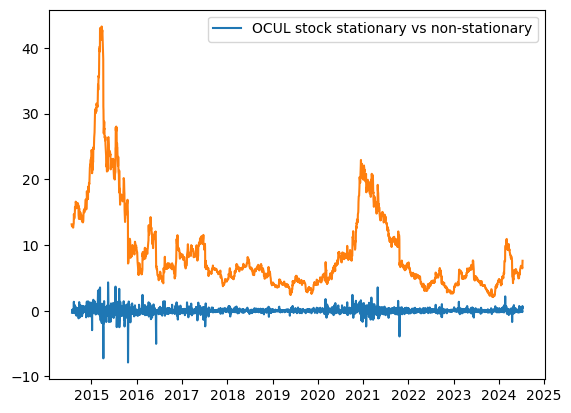

In [25]:
plt.plot(data_stationary.index, data_stationary.Close)  
plt.plot(data.index, data.Close)  
plt.legend(['OCUL stock stationary vs non-stationary'])

plt.show()

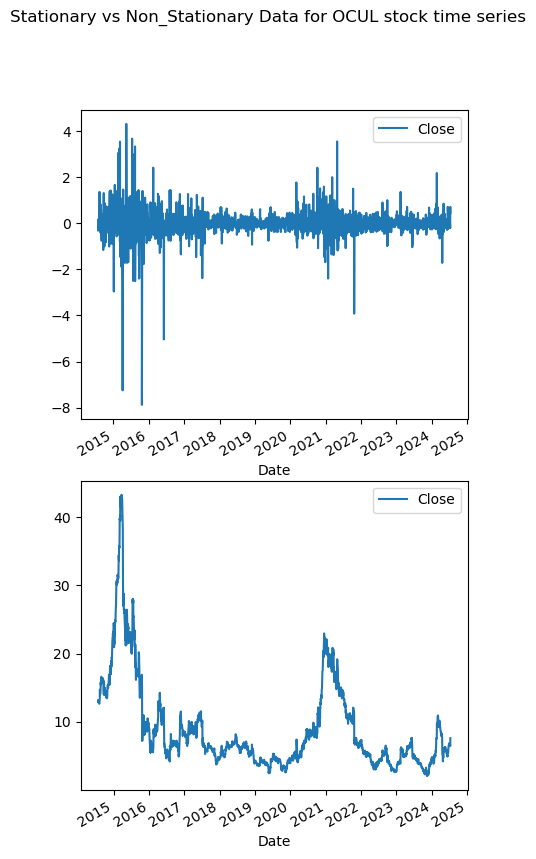

In [26]:
# separate plots
fig, axs = plt.subplots(2,1, figsize = (5,10))
data_stationary.plot(y='Close', ax=axs[0])
data.plot(y='Close', ax=axs[1])
plt.suptitle('Stationary vs Non_Stationary Data for OCUL stock time series')
plt.show()

Transform data to standardize variance and reduce long-term drift

calculate each timepoint's percent change over the mean of a window of previous timepoints

This makes timepoints more comparable to one another if the absolute values of data change a lot

Transforming to percent change with Pandas  In this function, we first separate out the final value of the input array. Then, we calculate the mean of all but the last datapoint. Finally, we subtract the mean from the final datapoint, and divide by the mean. The result is the percent change for the final value.

In [27]:
def percent_change(values):
    """Calculates the % change between the last value and the mean of the previous values"""
    # Separate the last value and all previous values into variables
    previous_values = values[:-1]
    last_value = values[-1]
    
    # Calculate the % difference between the last value and the mean of the earlier values
    percent_change = (last_value - np.mean(previous_values))/np.mean(previous_values)
    return percent_change

Apply the definition to our dat ausing the .aggregate method, passing our function as an input

Text(0.5, 0.98, 'Percent Change over time (using mean of previous 20 Days)')

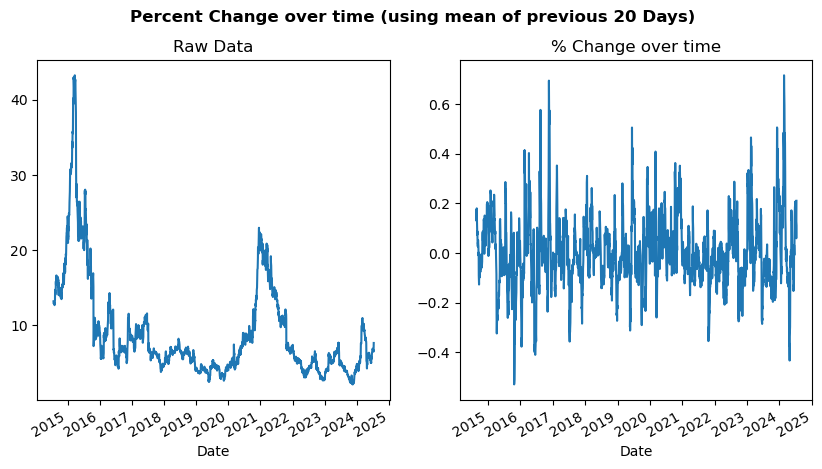

In [28]:
# Plot the raw data
fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = data['Close'].plot(ax=axs[0])

# Calculate % percent change and plot
ax = data['Close'].rolling(window=20).aggregate(percent_change).plot(ax=axs[1])

axs[0].set_title('Raw Data')
axs[1].set_title('% Change over time')
plt.suptitle('Percent Change over time (using mean of previous 20 Days)', fontweight = 'bold')


**Finding outliers in data**
We'll use this transformation to detect outliers. Outliers are datapoints that are statistically different from the dataset as a whole. A common definition is any datapoint that is more than three standard deviations away from the mean of the dataset.

Compare stock price with quarterly earnings

In [29]:
earnings_data = pd.read_csv('../data/OCUL_historical_earnings.csv',index_col='Date', parse_dates=True)
earnings_data.head()

,Quarter,Consensus Estimate,Reported EPS,Beat/Miss,GAAP EPS,Revenue Estimate,Actual Revenue,Unnamed: 8
Date,,,,,,,,
2024-05-07,Q1 2024,($0.18),($0.24),($0.06),$0.01,$15.43 million,$14.77 million,NaN
2024-03-11,Q4 2023,($0.28),($0.28),-,($0.21),$15.31 million,$14.80 million,NaN
2023-11-07,Q3 2023,($0.27),($0.51),($0.24),($0.77),$15.41 million,$15.08 million,NaN
2023-08-07,Q2 2023,($0.29),($0.27),$0.02,($0.28),$14.64 million,$15.19 million,NaN
2023-05-08,Q1 2023,($0.27),($0.31),($0.04),($0.23),$14.02 million,$13.37 million,NaN


In [30]:
earnings_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2024-05-07 to 2014-08-28
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quarter             40 non-null     object 
 1   Consensus Estimate  40 non-null     object 
 2   Reported EPS        40 non-null     object 
 3   Beat/Miss           40 non-null     object 
 4   GAAP EPS            40 non-null     object 
 5   Revenue Estimate    40 non-null     object 
 6   Actual Revenue      40 non-null     object 
 7   Unnamed: 8          0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 2.8+ KB


In [31]:
earnings = earnings_data[['Reported EPS','Actual Revenue']]
earnings.head()

,Reported EPS,Actual Revenue
Date,,
2024-05-07,($0.24),$14.77 million
2024-03-11,($0.28),$14.80 million
2023-11-07,($0.51),$15.08 million
2023-08-07,($0.27),$15.19 million
2023-05-08,($0.31),$13.37 million


In [32]:
earnings.dtypes

Reported EPS      object
Actual Revenue    object
dtype: object

In [33]:
earnings.rename(columns={'Reported EPS':'EPS', 'Actual Revenue':'Revenue'}, inplace = True)
earnings.head()


,EPS,Revenue
Date,,
2024-05-07,($0.24),$14.77 million
2024-03-11,($0.28),$14.80 million
2023-11-07,($0.51),$15.08 million
2023-08-07,($0.27),$15.19 million
2023-05-08,($0.31),$13.37 million


## Clean Data in earnings dataframe

In [34]:
earnings['EPS'][0][6]

')'

In [35]:
# "EPS" and 'Revenue' are object columns. Remove commas and change type to "float"

earnings["Revenue"] = earnings["Revenue"].apply(lambda x: x.replace("$", ""))
earnings["Revenue"] = earnings["Revenue"].apply(lambda x: x.replace("million", ""))
earnings["Revenue"] = earnings["Revenue"].astype(float)




# change accounting format of EPS in negative floats. i.e. ($0.24) in -0.24 

#earnings["EPS"] = earnings["EPS"].astype(float)
earnings["EPS"] = earnings["EPS"].apply(lambda x: x.replace("($", "-") if x[0][0] == '(' else x[0:])
earnings["EPS"] = earnings["EPS"].apply(lambda x: x.replace(")", "") if x[-1] == ')' else x[0:])
earnings["EPS"] = earnings["EPS"].astype(float)

earnings.head()


,EPS,Revenue
Date,,
2024-05-07,-0.24,14.77
2024-03-11,-0.28,14.80
2023-11-07,-0.51,15.08
2023-08-07,-0.27,15.19
2023-05-08,-0.31,13.37


In [36]:
earnings.dtypes  # check for data types

EPS        float64
Revenue    float64
dtype: object

In [37]:
#earnings["EPS"] = earnings["EPS"].apply(lambda x: x.replace(")", "") if x[-1] == ')' else x[0:])
#earnings['EPS']

In [38]:
earnings.dtypes

EPS        float64
Revenue    float64
dtype: object

In [39]:
earnings.index

DatetimeIndex(['2024-05-07', '2024-03-11', '2023-11-07', '2023-08-07',
               '2023-05-08', '2023-03-06', '2022-11-07', '2022-08-08',
               '2022-05-09', '2022-02-28', '2021-11-08', '2021-08-09',
               '2021-05-05', '2021-03-11', '2020-11-05', '2020-08-07',
               '2020-05-08', '2020-03-12', '2019-11-12', '2019-08-07',
               '2019-05-10', '2019-03-07', '2018-11-07', '2018-08-07',
               '2018-05-08', '2018-03-08', '2017-11-07', '2017-08-08',
               '2017-05-05', '2017-03-10', '2016-11-09', '2016-08-09',
               '2016-05-10', '2016-03-10', '2015-11-10', '2015-08-10',
               '2015-05-15', '2015-03-10', '2014-11-12', '2014-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

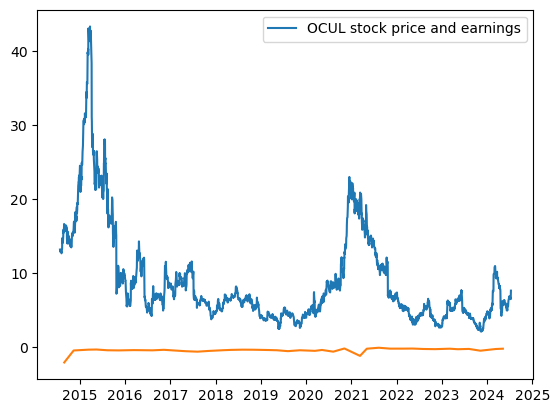

In [40]:
plt.plot(data.index, data.Close)  
plt.plot(earnings.index, earnings.EPS)  
plt.legend(['OCUL stock price and earnings'])

plt.show()

Plot stock price and earnings together using twin axes

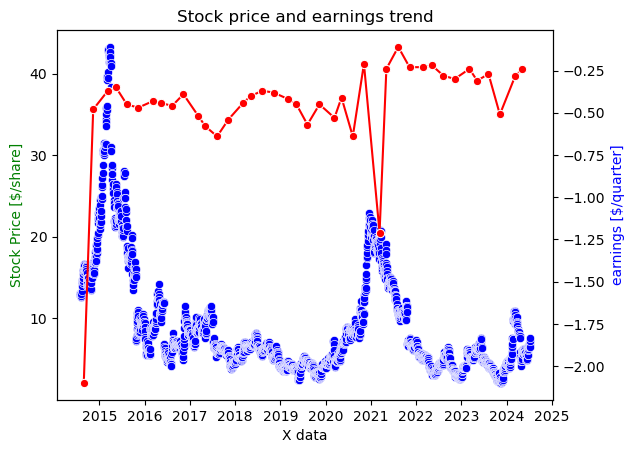

In [41]:
fig, ax1 = plt.subplots()  # Initialize the figure and primary y-axis
ax2 = ax1.twinx()  # Create the secondary y-axis

# Plot the data on each axis
sns.scatterplot(x=data.index, y=data['Close'], ax=ax1, color='blue')  # Bar plot on the primary y-axis
sns.lineplot(x=earnings.index, y=earnings['EPS'], marker='o', color='red', ax=ax2)  # Line plot on the secondary y-axis

# Set labels for both axes
ax1.set_xlabel('X data')
ax1.set_ylabel('Stock Price [$/share]', color='g')  # Primary y-axis label
ax2.set_ylabel('earnings [$/quarter]', color='b')  # Secondary y-axis label
plt.title('Stock price and earnings trend')
plt.show()  # Display the plot

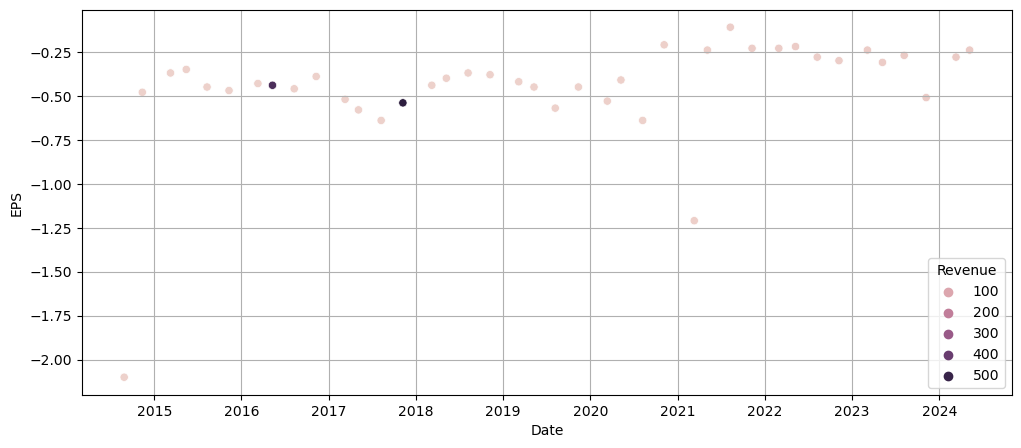

In [42]:
fig, ax=plt.subplots(figsize=(12,5))
ax.grid(True)
sns.scatterplot(x=earnings.index,
               y='EPS',
               data=earnings,
               hue='Revenue',
               color = 'red')

plt.show()

In [43]:
earnings.reset_index(inplace=True)
earnings.head()

,Date,EPS,Revenue
0,2024-05-07,-0.24,14.77
1,2024-03-11,-0.28,14.80
2,2023-11-07,-0.51,15.08
3,2023-08-07,-0.27,15.19
4,2023-05-08,-0.31,13.37


In [44]:
data.reset_index(inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-25,13.00,13.25,12.611,13.15,13.15,1877800
1,2014-07-28,13.05,13.25,12.800,12.84,12.84,292500
2,2014-07-29,12.85,13.00,12.560,12.90,12.90,103300
3,2014-07-30,13.00,13.07,12.810,12.94,12.94,80600
4,2014-07-31,12.94,13.09,11.900,12.86,12.86,154300


In [45]:
# save the data to a new csv file
datapath = '../data/Preprocessed_data'
save_file(data, 'data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data/Preprocessed_data\data_cleaned.csv"


In [46]:
# save the data to a new csv file
datapath = '../data/Preprocessed_data'
save_file(earnings, 'earnings_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data/Preprocessed_data\earnings_cleaned.csv"
